## Initial imports and loading data with Pandas

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('mode.chained_assignment', None)

In [492]:
data = pd.read_csv('movie_metadata.csv')

## Understanding your data

You need to "run" the two cells below, to do that select the cell and press:  *`Shift-Enter`*

In [493]:
# Run this cell (to do so press Shift-Enter)
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [494]:
data.shape

(5043, 28)

In [495]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Some key points from this table:
- Avg movie duration is 107.2 minutes
- Avg imdb is 6.44
- Avg number of users reviews is 272

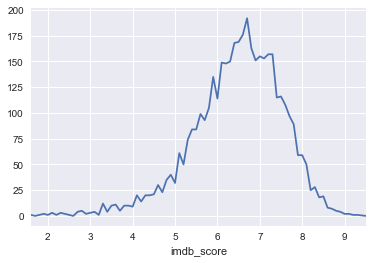

In [496]:
# IMDb rating distribution
data_groupby_ratings = data.groupby(['imdb_score'])['gross'].count()
data_groupby_ratings.plot()

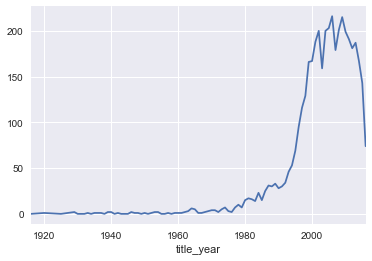

In [497]:
# movie year vs gross
data_groupby_gross = data.groupby(['title_year'])['gross'].count()
data_groupby_gross.plot()

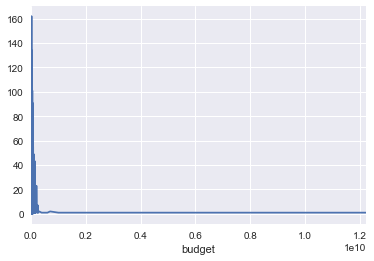

In [498]:
# budget vs gross
data_groupby_gross = data.groupby(['budget'])['gross'].count()
data_groupby_gross.plot()

In [499]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


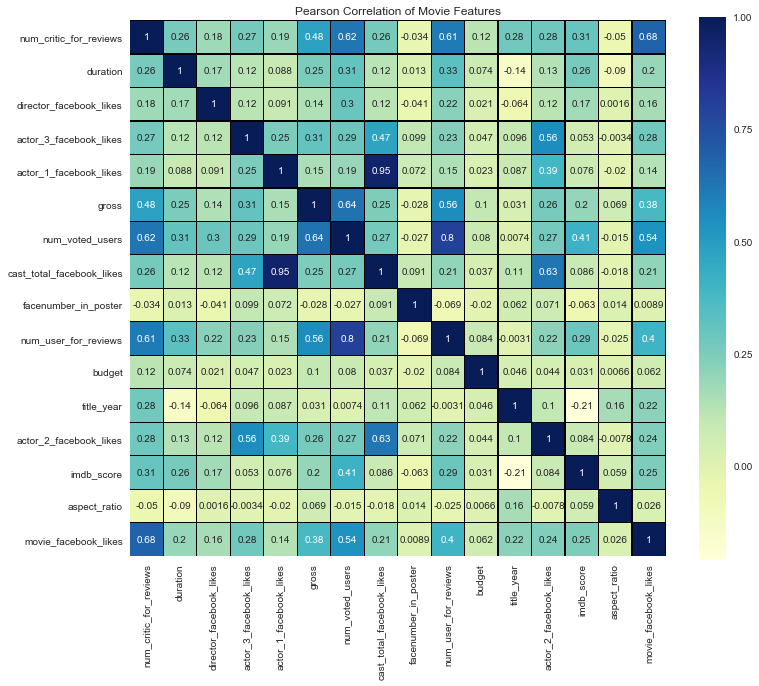

In [500]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

In [501]:
data.corr()['gross'].sort_values(ascending=False)

gross                        1.000000
num_voted_users              0.637271
num_user_for_reviews         0.559958
num_critic_for_reviews       0.480601
movie_facebook_likes         0.378082
actor_3_facebook_likes       0.308026
actor_2_facebook_likes       0.262768
duration                     0.250298
cast_total_facebook_likes    0.247400
imdb_score                   0.198021
actor_1_facebook_likes       0.154468
director_facebook_likes      0.144945
budget                       0.102179
aspect_ratio                 0.069346
title_year                   0.030886
facenumber_in_poster        -0.027755
Name: gross, dtype: float64

The gross box office correlates strongly with num_voted_users, num_users_for_reviews and movie_facebook_likes. But some of those features are also highly correlated among each other (as you can see in the heatmap above).

## Clean your data

### Dealing with duplicates

In [502]:
print ('Number of duplicates in data: {}'.format(
    sum(data.duplicated(subset=['movie_title', 'title_year'], keep=False))))

Number of duplicates in data: 241


In [503]:
data = data.drop_duplicates(subset=['movie_title', 'title_year'], keep='first').copy()

### Fixing Null values

In [504]:
# check if data has any null/nan values
data.isnull().values.any()

True

In [505]:
# Check how many values are null in each column
def show_missing_data(data):
    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (data.shape[0] - missing_data['missing_count']) / data.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,gross,863,82.455784
1,budget,485,90.140272
2,aspect_ratio,326,93.372637
3,content_rating,301,93.880870
4,plot_keywords,152,96.909941


As we are working with the Gross Box Office, rows without it are of no use. So we will exclude those films that are missing the Gross Box Office.

In [506]:
data.dropna(subset=['gross'], how='all', inplace=True)
show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,budget,266,93.441815
1,aspect_ratio,104,97.435897
2,content_rating,64,98.422091
3,plot_keywords,40,99.013807
4,actor_3_name,13,99.679487


Fill out missing budget datapoints with the median budget for the year it was released.

In [507]:
median_budget_per_year = data.groupby('title_year')['budget'].transform('median')
data['budget'].fillna(median_budget_per_year, inplace=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,aspect_ratio,104,97.435897
1,content_rating,64,98.422091
2,plot_keywords,40,99.013807
3,actor_3_name,13,99.679487
4,actor_3_facebook_likes,13,99.679487


Fill out the rest of the missing data

In [508]:
data.fillna(0, inplace=True)

## Gross Box Office Prediction

### Getting numerical data

In [509]:
numerical_columns = data.dtypes[data.dtypes!='object'].index
data = data[numerical_columns]
data.drop('aspect_ratio', axis=1, inplace=True)
data.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0


### Preparing train and test datasets

In [510]:
train, test = train_test_split(data, test_size=0.2)
target_train = train.pop('gross')
target_test = test.pop('gross')

In [511]:
print('Train data: {} / {} = {}'.format(len(train), len(data), float(len(train)/len(data))))
print('Test data: {} / {} = {}'.format(len(test), len(data), float(len(test)/len(data))))

Train data: 3244 / 4056 = 0.7998027613412229
Test data: 812 / 4056 = 0.20019723865877712


### Linear Regression

In [512]:
model = LinearRegression()
model.fit(train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [513]:
prediction = model.predict(test)

Coefficients: 
 [  7.48736588e+04   1.46559010e+05  -1.34985969e+03  -1.19814231e+04
  -1.06355354e+04   2.22024985e+02   1.06307221e+04  -9.62263135e+05
   1.57021959e+04   8.31257715e-03  -6.24727562e+03  -1.02165886e+04
  -6.38883865e+06  -3.51426213e+01]
Mean squared error: 2441434335660461.00
Variance score: 0.48


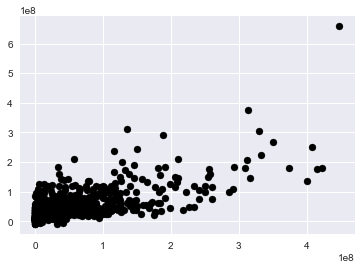

In [514]:
# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, prediction))

# Plot outputs
plt.scatter(target_test, prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

### Random Forest

In [515]:
forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

my_forest = forest.fit(train, target_train)

In [516]:
my_forest.feature_importances_

array([ 0.02389077,  0.02778691,  0.01343401,  0.01686642,  0.0117299 ,
        0.52377177,  0.01946664,  0.00459315,  0.03107804,  0.23016521,
        0.0348956 ,  0.01581851,  0.0244442 ,  0.02205886])

In [517]:
forest_prediction = my_forest.predict(test)

Mean squared error: 1458341827017270.75
Variance score: 0.69


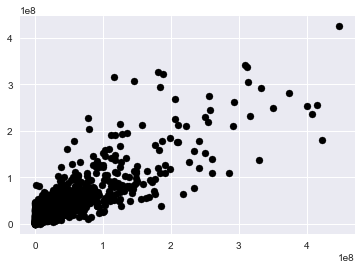

In [518]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, forest_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, forest_prediction))

# Plot outputs
plt.scatter(target_test, forest_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()